# Aufgaben





Elias Schuck

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import statsmodels.formula.api as smf

## Aufgabe 6
**Haben mehr Frauen oder mehr Männer unsere Autos gekauft?**


Absolute Anzahl weiblicher Kunden :398
Absolute Anzahl männlicher Kunden :706


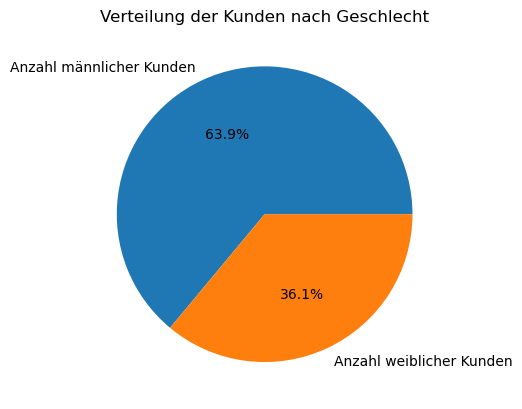

In [2]:
df = pd.read_csv("data/df_final.csv")
df_käufer = df[df["Preis"] > 0]
df_käufer
df_käufer_w = df_käufer[df_käufer['Geschlecht']==0]
anzahl_kunden_w = df_käufer_w['Geschlecht'].count()
print('Absolute Anzahl weiblicher Kunden :' +str(anzahl_kunden_w))
df_käufer_m = df_käufer[df_käufer['Geschlecht']==1]
anzahl_kunden_m = df_käufer_m['Geschlecht'].count()
print('Absolute Anzahl männlicher Kunden :' +str(anzahl_kunden_m))
x = [anzahl_kunden_m/(anzahl_kunden_m+anzahl_kunden_w), anzahl_kunden_w/(anzahl_kunden_m+anzahl_kunden_w)]
y = ['Anzahl männlicher Kunden', 'Anzahl weiblicher Kunden']
plt.pie(x, labels = y, autopct='%1.1f%%')
plt.title("Verteilung der Kunden nach Geschlecht")
plt.show()

## Aufgabe 7
**Wie hoch ist das Durchschnittsalter unserer Kunden?**
<p>df_käufer["Alter"].mean().round(2)</p>
<p>50.38</p>

## Aufgabe 8
**Wie hoch ist das Durchschnittsalter der Besucher in unseren Showrooms?**

<p> Zunächst werden die Besucher von den Käufern isoliert (Kaufpreis = 0) </p>
<p> df_besucher = df[df['Preis']==0] </p>
Nun kann das Durchsnittsalter der Besucher errechnet werden:

df_besucher['Alter'].mean().round(2)

49.88


## Aufgabe 9
**Was ist das Durchschnittsalter unserer männlichen Kunden?**

<p> df_käufer_m['Alter'].mean().round(2) </p>
<p> 50.47 </p>

## Aufgabe 13
**Wie viele Kunden haben keinen Kredit bei der Bank genommen, um das Auto zu kaufen? Die Kundenabteilung hat vergessen, diese Informationen zu sammeln. Wir können davon ausgehen, dass die Kunden mit einem Jahreseinkommen, das höher als der Autopreis ist, keinen Bankkredit benötigten**

Der dataframe wird so mainpuliert, dass nur die Datensätze enthalten bleiben, für die zutrifft, dass das Einkommen des Kunden größer als der gezahlte Preis des Autos ist:

df_käufer_kein_kredit = df_käufer[df_käufer['Einkommen'] > df_käufer['Preis']]

df_käufer_kein_kredit

In [3]:
df_käufer_kein_kredit = df_käufer[df_käufer['Einkommen'] > df_käufer['Preis']]

print(df_käufer_kein_kredit)

prozentuale_vert = df_käufer_kein_kredit['Alter'].count()/df_käufer['Alter'].count()

     Alter  Einkommen     Preis  Geschlecht  Zeit KundeNr        Niederlassung
157     32    50330.0  49540.28         1.0  27.0   K0175               Bayern
407     34    24264.0  22580.44         1.0  19.0   K0859               Berlin
499     37    54403.0  53690.36         0.0  47.0   K0364          Brandenburg
642     32    30856.0  27934.83         1.0  18.0   K0447  Nordrhein-Westfalen
696     31    36296.0  35482.61         0.0  31.0   K0143  Nordrhein-Westfalen


In [4]:
print('Prozentuales Verhältnis Kunden ohne Kredit zu Kunden Gesamt : ' + str(prozentuale_vert.round(3)*100) +'%')

Prozentuales Verhältnis Kunden ohne Kredit zu Kunden Gesamt : 0.5%


* Es gibt also 5 Kunden die keinen Kredit Aufgenommen haben um das Auto zu kaufen.
* Diese 5 Kunden entsprechen etwa 0.5% der gesamten Kundschaft

## Aufgabe 17

**Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt. Verwenden Sie die entsprechende Methode**

Die Kaufwahrscheinlichkeit wird beeinflusst durch Folgende Faktoren:

* Alter

* Geschlecht

* Einkommen

* Zeit

Diese bilden die unabhängigen Variablen, welche mit einer logistischen Regression analysiert werden sollen.

* Zunächst wird die Spalte 'Gekauft' als abhängige Variable eingeführt, um zu messen ob der Kunde das  Auto gekauft hat wobei 1 gekauft und 0 nicht gekauft bedeutet


In [5]:
df_gekauft = df[['Preis']]>0

df_gekauft.columns = ['Gekauft']

df_gekauft_int = df_gekauft[["Gekauft"]].astype(int)

df_linear_regression = pd.concat([df, df_gekauft_int], axis = 1)

print(df_linear_regression.head())

   Alter  Einkommen      Preis  Geschlecht  Zeit KundeNr      Niederlassung  \
0     64    66894.0   88160.31         1.0  43.0   K0310             Bayern   
1     54    77644.0  103145.70         1.0  40.0   K1042             Berlin   
2     55    44341.0   80565.16         0.0  37.0   K0382  Baden-Württemberg   
3     49    67271.0   83949.89         0.0  42.0   K0498             Bayern   
4     46    49832.0   93781.58         0.0  41.0   K0552             Hessen   

   Gekauft  
0        1  
1        1  
2        1  
3        1  
4        1  


Da nun alle benötigten Daten in dem Dataframe df_linear_regression vorhanden sind, kann die lineare Regression mit der abhängigen Variable 'Gekauft' und den unabhängigen Variablen 'Alter', 'Geschlecht', 'Einkommen' sowie 'Zeit' durchgeführt werden:
 <p> reg1 = smf.logit('Gekauft ~ Alter + Geschlecht + Einkommen + Zeit', data=df_linear_regression).fit() </p>

Dies führt zu folgendem Ergebnis :

In [6]:
reg1 = smf.logit('Gekauft ~ Alter + Geschlecht + Einkommen + Zeit', data=df_linear_regression).fit()
print(reg1.summary())

Optimization terminated successfully.
         Current function value: 0.579019
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Gekauft   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Tue, 02 Jan 2024   Pseudo R-squ.:                  0.1577
Time:                        08:48:19   Log-Likelihood:                -1155.1
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 2.522e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4436      0.263     -9.275      0.000      -2.960      -1.927
Alter          0.0181      0.

## Aufgabe 18

**Wie hoch ist die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft? Wie hoch ist die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft?**

In [7]:
from statsmodels.api import add_constant

Zunächst wird ein Datframe erzeugt, der die Ausprägungen der unabhängigen Variablen für die zwei zu prognostizierenden Fälle enthält.

* Index 0: 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat

* Index 1: 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat

In [8]:
Prognose = pd.DataFrame({
    'Alter': [32, 51],           
    'Einkommen': [30000, 54000],
    'Geschlecht' : [1, 1],
    'Zeit' : [30, 45]
})
Prognose = add_constant(Prognose, has_constant='add')
print(Prognose)

   const  Alter  Einkommen  Geschlecht  Zeit
0    1.0     32      30000           1    30
1    1.0     51      54000           1    45


Anschließend wird die Prognose durchgeführt: 

Prognostizierte_Wahrscheinlichkeiten = reg1.predict(Prognose)
print(Prognostizierte_Wahrscheinlichkeiten*100)

In [9]:
Prognostizierte_Wahrscheinlichkeiten = reg1.predict(Prognose)
print(Prognostizierte_Wahrscheinlichkeiten*100)

0    54.562119
1    74.039605
dtype: float64


* Die Wahrscheinlichkeit, dass ein 32-jähriger männlicher Kunde mit einem Einkommen von 30.000 Euro, der das Auto 30 Minuten lang getestet hat, eines unserer Modelle kauft beträgt 54,6 %
* Die Wahrscheinlichkeit, dass ein 51-jähriger männlicher Kunde mit einem Einkommen von 54.000 Euro, der das Auto 45 Minuten lang getestet hat, eines unserer Modelle kauft beträgt 74 %